<a href="https://colab.research.google.com/github/alaminbhuyan/Bootstrap-project/blob/master/Classifydegits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tensorflow import keras
from keras.layers import Dense
from keras.utils import to_categorical

# Load datasets

In [4]:
(xtrain,ytrain),(xtest,ytest) = keras.datasets.mnist.load_data()

In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
xtest.shape

(10000, 28, 28)

In [7]:
xtrain[1].shape

(28, 28)

In [8]:
xtrain[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

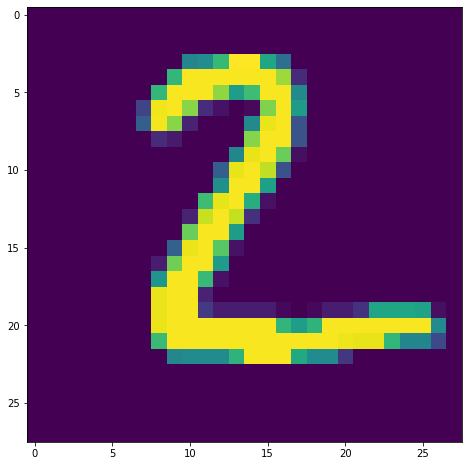

In [10]:
plt.figure(figsize=(10,8))
plt.imshow(xtest[1])
plt.show()

## Featurs scalling normalization

In [11]:
xtrain = (xtrain/255)
xtest = (xtest/255)

In [12]:
xtrain

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [13]:
xtest

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## flatten the images into 28*28 = 784

In [14]:
xtrain = xtrain.reshape(-1,784)
xtest = xtest.reshape(-1,784)

In [15]:
xtrain.shape

(60000, 784)

In [16]:
xtest.shape

(10000, 784)

# Model build

In [17]:
# sequiential 
# 3 layers first 2 layers 64 neuron relu function
# output layers 10 neuron and softmax function

model = keras.Sequential()

In [18]:
model.add(Dense(64,activation="relu",input_dim = 784)) # for input layers
model.add(Dense(64,activation="relu")) # hidden layers
model.add(Dense(10,activation="softmax")) # output layers

## Compile the model

In [19]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

## Fit the model

In [20]:
model.fit(xtrain,to_categorical(ytrain),epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2823 - accuracy: 0.9183
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1327 - accuracy: 0.9597
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0989 - accuracy: 0.9700
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0776 - accuracy: 0.9758
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0626 - accuracy: 0.9802
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0508 - accuracy: 0.9837
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0431 - accuracy: 0.9861
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0386 - accuracy: 0.9872
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0308 - accuracy: 0.9900
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.027

## Evaluate the model

In [21]:
model.evaluate(xtest,to_categorical(ytest))

313/313 [==============================] - 1s 3ms/step - loss: 0.1057 - accuracy: 0.9762


[0.10573897510766983, 0.9761999845504761]

In [22]:
pred = model.predict(xtest)

In [23]:
pred

array([[2.4929663e-11, 1.7056994e-12, 2.7933362e-08, ..., 1.0000000e+00,
        6.9825745e-09, 2.5365199e-09],
       [5.5669963e-17, 1.1955444e-06, 9.9999881e-01, ..., 1.4185773e-14,
        8.0506526e-15, 4.3546220e-19],
       [2.8481306e-10, 9.9995506e-01, 9.2960185e-08, ..., 2.0356003e-05,
        2.4043427e-05, 1.6583510e-08],
       ...,
       [1.2290545e-23, 2.0256284e-21, 4.2533906e-21, ..., 3.9770404e-17,
        2.2600149e-17, 1.5143990e-14],
       [1.6703324e-16, 5.1807978e-21, 2.4750519e-15, ..., 2.6716461e-18,
        1.3848822e-07, 3.2364540e-19],
       [2.6083948e-14, 1.0835214e-21, 1.9999458e-13, ..., 3.8930667e-27,
        3.3922687e-14, 5.5038255e-13]], dtype=float32)

In [24]:
np.argmax(pred[1])

2

Text(87.0, 0.5, 'Truth Values')

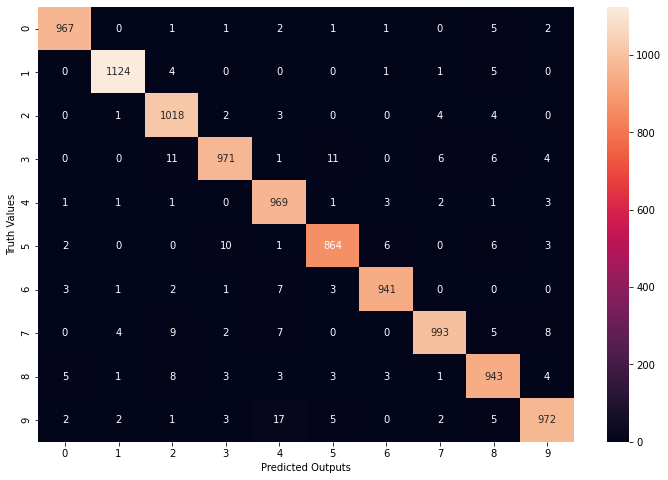

In [27]:
y_pred = model.predict(xtest)
ypred = [np.argmax(i) for i in y_pred]
con_matrix = tf.math.confusion_matrix(labels=ytest, predictions=ypred)
plt.figure(figsize=(12,8))
sns.heatmap(con_matrix,annot=True, fmt='d')
plt.xlabel('Predicted Outputs')
plt.ylabel('Truth Values')